In [2]:
import pandas as pd
import numpy as np

file_path = r"C:\Users\ASUS\Downloads\myexcel.xlsx"
df = pd.read_excel(file_path)

# Replace 'height' column values with random integers between 150 and 180
df['height'] = np.random.randint(150, 181, df.shape[0])

df.info()
print(df.head())
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    object 
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
 9   height    458 non-null    int32  
dtypes: float64(1), int32(1), int64(3), object(5)
memory usage: 34.1+ KB
            Name            Team  Number Position  Age               Height  \
0  Avery Bradley  Boston Celtics       0       PG   25  2023-02-06 00:00:00   
1    Jae Crowder  Boston Celtics      99       SF   25  2023-06-06 00:00:00   
2   John Holland  Boston Celtics      30       SG   27  2023-05-06 00:00:00   
3    R.J. Hunter  Boston Celtics      

In [6]:
# Distribution of employees across each team
team_distribution = df['Team'].value_counts()
team_percentage = (team_distribution / df.shape[0]) * 100
# Print team distribution and percentage
print("Team Distribution:\n", team_distribution)
print("\nTeam Percentage:\n", team_percentage)

Team Distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentage:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies   

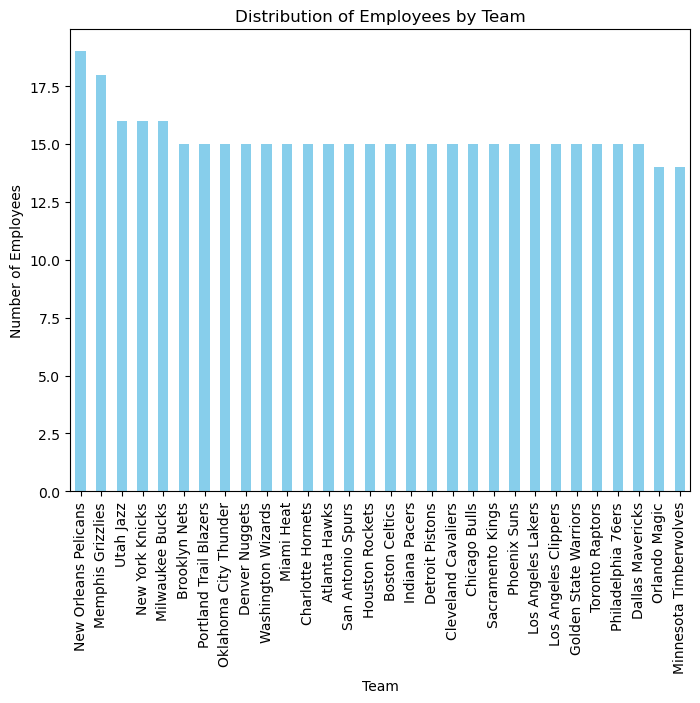

Position Distribution:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


In [8]:
# Plot the distribution
plt.figure(figsize=(8, 6))
team_distribution.plot(kind='bar', color='skyblue')
plt.title("Distribution of Employees by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.show()

# Distribution of employees by position
position_distribution = df['Position'].value_counts()
print("Position Distribution:\n", position_distribution)

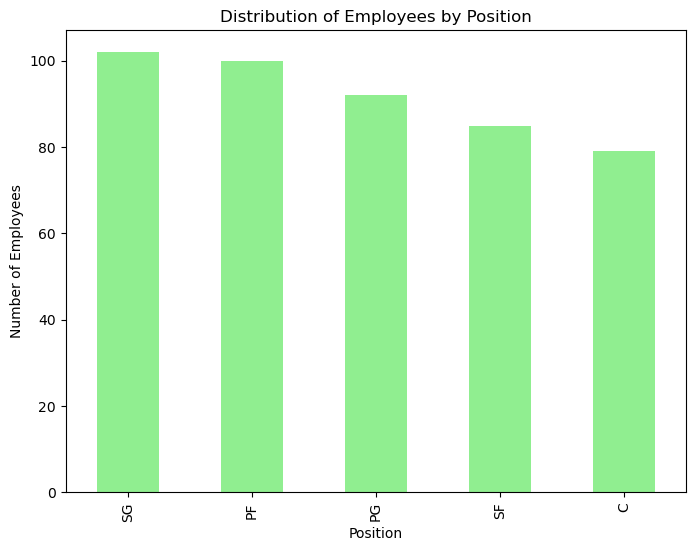

In [10]:
# Plot the distribution
plt.figure(figsize=(8, 6))
position_distribution.plot(kind='bar', color='lightgreen')
plt.title("Distribution of Employees by Position")
plt.xlabel("Position")
plt.ylabel("Number of Employees")
plt.show()

Age Group Distribution:
 age_group
20-29    346
30-39     91
40-49      0
50-59      0
Name: count, dtype: int64


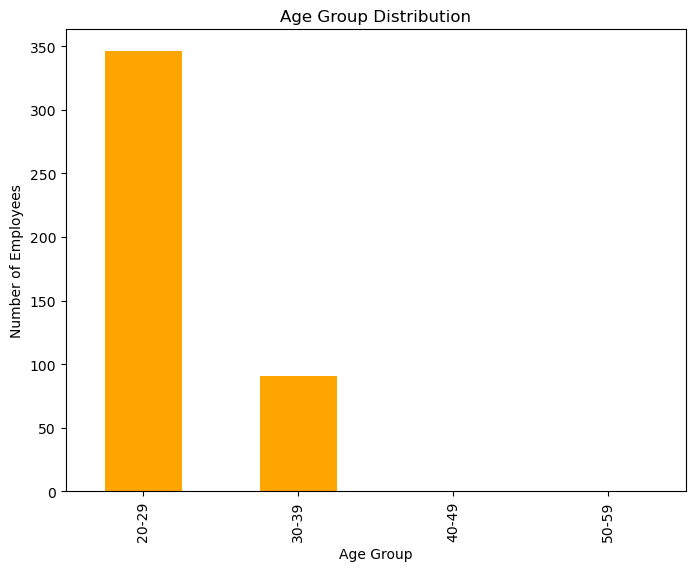

In [12]:
# Define age bins and labels
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-29', '30-39', '40-49', '50-59']
df['age_group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Count the number of employees in each age group
age_group_distribution = df['age_group'].value_counts().sort_index()
print("Age Group Distribution:\n", age_group_distribution)

# Plot the age group distribution
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind='bar', color='orange')
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()

In [14]:
# Total salary expenditure by team
team_salary_expenditure = df.groupby('Team')['Salary'].sum()
highest_salary_team = team_salary_expenditure.idxmax()
print("Highest Salary Expenditure by Team:", highest_salary_team)

Highest Salary Expenditure by Team: Cleveland Cavaliers


In [16]:
# Total salary expenditure by position
position_salary_expenditure = df.groupby('Position')['Salary'].sum()
highest_salary_position = position_salary_expenditure.idxmax()
print("Highest Salary Expenditure by Position:", highest_salary_position)

Highest Salary Expenditure by Position: C


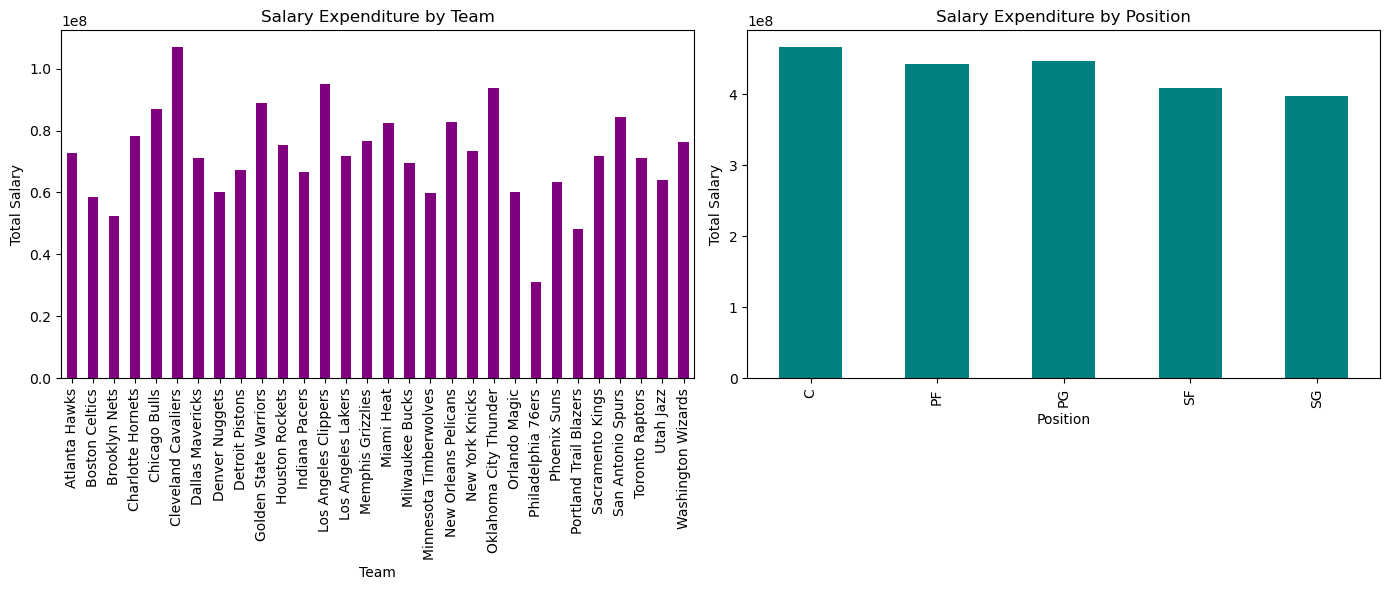

In [18]:
# Plot salary expenditure by team and position
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

team_salary_expenditure.plot(kind='bar', color='purple', ax=axs[0])
axs[0].set_title("Salary Expenditure by Team")
axs[0].set_xlabel("Team")
axs[0].set_ylabel("Total Salary")

position_salary_expenditure.plot(kind='bar', color='teal', ax=axs[1])
axs[1].set_title("Salary Expenditure by Position")
axs[1].set_xlabel("Position")
axs[1].set_ylabel("Total Salary")

plt.tight_layout()
plt.show()

Correlation between Age and Salary: 0.21400941226570955


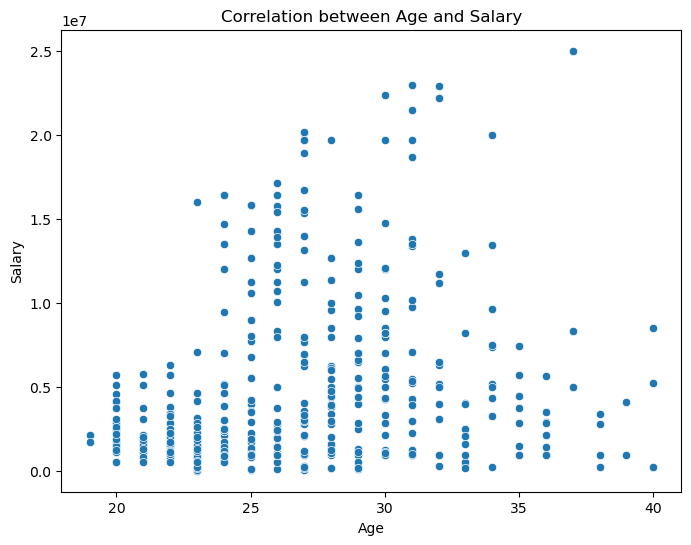

In [20]:
import seaborn as sns

# Calculate correlation
correlation = df[['Age', 'Salary']].corr().iloc[0, 1]
print(f"Correlation between Age and Salary: {correlation}")

# Scatter plot of age vs salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title("Correlation between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

In [22]:
# Insights for Team Distribution
print("\n1. Team Distribution Insights:")
print("The team distribution shows that the New Orleans Pelicans and Memphis Grizzlies have the highest representation in this dataset with 4.1% and 3.9% of employees, respectively.")
print("Overall, most teams have an even distribution of around 3.3% of the workforce each.")

# Insights for Position Distribution
print("\n2. Position Distribution Insights:")
print("The most common positions are Shooting Guard (SG) and Power Forward (PF), which together make up a significant portion of the workforce.")
print("Center (C) is the least represented position, which may indicate a higher demand for guards and forwards or their higher retention in teams.")

# Insights for Age Group Distribution
print("\n3. Age Group Distribution Insights:")
print("Most employees (346) are in the 20-29 age group, followed by 91 in the 30-39 range.")
print("This reflects a younger workforce typical for high-performance roles like professional athletes, as no employees are aged 40 or older.")

# Insights for Salary Expenditure by Team and Position
print("\n4. Salary Expenditure Insights:")
print("The team with the highest salary expenditure is the Cleveland Cavaliers, suggesting they may prioritize investing in high-value players.")
print("Among positions, Centers (C) have the highest total salary expenditure, likely due to the demand for this specific skill set.")

# Insights for Correlation between Age and Salary
print("\n5. Correlation between Age and Salary Insight:")
print(f"The correlation between age and salary is {correlation:.2f}, which shows a weak positive relationship.")
print("This indicates that salary tends to increase slightly with age, but age alone is not a strong predictor of salary. Performance, experience, and position likely play a larger role.")


1. Team Distribution Insights:
The team distribution shows that the New Orleans Pelicans and Memphis Grizzlies have the highest representation in this dataset with 4.1% and 3.9% of employees, respectively.
Overall, most teams have an even distribution of around 3.3% of the workforce each.

2. Position Distribution Insights:
The most common positions are Shooting Guard (SG) and Power Forward (PF), which together make up a significant portion of the workforce.
Center (C) is the least represented position, which may indicate a higher demand for guards and forwards or their higher retention in teams.

3. Age Group Distribution Insights:
Most employees (346) are in the 20-29 age group, followed by 91 in the 30-39 range.
This reflects a younger workforce typical for high-performance roles like professional athletes, as no employees are aged 40 or older.

4. Salary Expenditure Insights:
The team with the highest salary expenditure is the Cleveland Cavaliers, suggesting they may prioritize in